In [13]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [14]:
def plot_metrics(data_frame):
    block_size = 100
    df['episode_block'] = df.index // block_size
    
    df_mean = df.groupby('episode_block').mean()
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    ax[0, 0].set_title("$C_{bp}$")
    ax[0, 0].set_ylim(0, 1)
    df_mean['cbp'].plot(ax=ax[0, 0])
    
    ax[0, 1].set_title("$C_{bt2}$(Success)")
    ax[0, 1].set_ylim(0, 1)
    df_mean['cbt2'].plot(ax=ax[0, 1])
    
    ax[1, 0].set_title("$C_{bn}$")
    ax[1, 0].set_ylim(0, 1)
    df_mean['cbn'].plot(ax=ax[1, 0])
    
    ax[1, 1].set_title("$Cumulative Reward$")
    ax[1, 1].set_ylim(0, 10)
    df_mean['rtn'].plot(ax=ax[1, 1])

In [3]:
def compare_metrics(dataframe1, dataframe2, name1, name2):
    block_size = 100
    # 1) 공통 길이 산출 및 '완전한 블록'까지만 자르기
    min_len = min(len(df), len(compare_df))
    trim_len = (min_len // block_size) * block_size   # 마지막 불완전 블록 제거(공정 비교)
    
    df_trim = dataframe1.iloc[:trim_len].copy()
    compare_trim = dataframe2.iloc[:trim_len].copy()
    
    # 2) 블록 인덱스 부여
    df_trim['episode_block'] = df_trim.index // block_size
    compare_trim['episode_block'] = compare_trim.index // block_size
    
    # 3) 블록 평균
    df_mean = df_trim.groupby('episode_block').mean(numeric_only=True)
    compare_mean = compare_trim.groupby('episode_block').mean(numeric_only=True)
    
    # 4) 플롯
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # subplot 1
    ax[0].set_title("$C_{bp}$");  ax[0].set_ylim(0, 1)
    df_mean['cbp'].plot(ax=ax[0], label=name1)
    compare_mean['cbp'].plot(ax=ax[0], label=name2)
    ax[0].legend()
    
    # subplot 2
    ax[1].set_title("$C_{bt2}$"); ax[1].set_ylim(0, 1)
    df_mean['cbt2'].plot(ax=ax[1], label=name1)
    compare_mean['cbt2'].plot(ax=ax[1], label=name2)
    ax[1].legend()
    
    # subplot 3
    ax[2].set_title("$C_{bn}$");  ax[2].set_ylim(0, 1)
    df_mean['cbn'].plot(ax=ax[2], label=name1)
    compare_mean['cbn'].plot(ax=ax[2], label=name2)
    ax[2].legend()
    
    # subplot 4
    plt.tight_layout()
    plt.show()

In [4]:
def plot_sorted_cumulative_reward(dataframe):
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title("Sorted Cumulative Reward")
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative Reward")
    df_sort = dataframe.sort_values('rtn').reset_index(drop=True)
    df_sort.query('cbp==0')['rtn'].plot(label='$C_{bp}=0$')
    df_sort.query('(cbp==1) & (cbt2==0)')['rtn'].plot(label='$C_{bp}=1,\ C_{bt2}=0$')
    df_sort.query('cbt2==1')['rtn'].plot(label='$C_{bt2}=1$')
    
    prev = None
    
    for i, val in enumerate(df_sort['cbp']):
        if prev is not None and prev != val:
            ax.axvline(i, color='black', linestyle='--', alpha=0.3)
        prev = val
    
    
    
    for i, val in enumerate(df_sort['cbt2']):
        if prev is not None and prev != val:
            ax.axvline(i, color='black', linestyle='--', alpha=0.3)
        prev = val
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

In [5]:
def plot_landing_point_with_return2D(df_plot):
    print(df_plot.count())
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.scatter(df_plot['ball_x'], df_plot['ball_z'], cmap='viridis', c=df_plot['rtn'])
    ax.set_aspect('equal')

In [6]:
def plot_landing_point_with_return3D(df_plot):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df_plot['ball_x'], df_plot['ball_z'], df_plot['ball_y'], c=df_plot['rtn'])
    ax.set_title("Reward 3D graph")
    ax.set_ylabel("ball Z")
    ax.set_xlabel("ball X")

In [15]:
df = pd.read_csv("../RobotTableTennisLab507/log/10_20_3.csv")
df = df.query('cbt1==1').reset_index(drop=True)

In [16]:
df

,ball_x,ball_y,ball_z,cbt1,cbp,cbt2,cbn,rtn,steps
0,-1.197464,-0.765924,-1.344277,1.0,0.0,0.0,0.0,0.000000,64.0
1,-1.474676,-0.765924,1.596330,1.0,0.0,0.0,0.0,0.000000,66.0
2,-2.184321,-0.765924,-0.516810,1.0,0.0,0.0,0.0,0.000000,77.0
3,-2.147219,-0.765924,1.697155,1.0,0.0,0.0,0.0,0.000000,82.0
4,-1.687324,-0.765924,-0.659144,1.0,0.0,0.0,0.0,0.000000,83.0
...,...,...,...,...,...,...,...,...,...
34867,0.859681,-0.036656,0.974619,1.0,1.0,0.0,0.0,1.743791,74.0
34868,0.573612,0.020000,-0.565278,1.0,1.0,0.0,0.0,1.723473,49.0
34869,0.060868,-0.005462,-0.200861,1.0,1.0,0.0,0.0,1.644206,33.0
34870,0.336086,0.208524,0.154720,1.0,0.0,0.0,0.0,0.000000,30.0


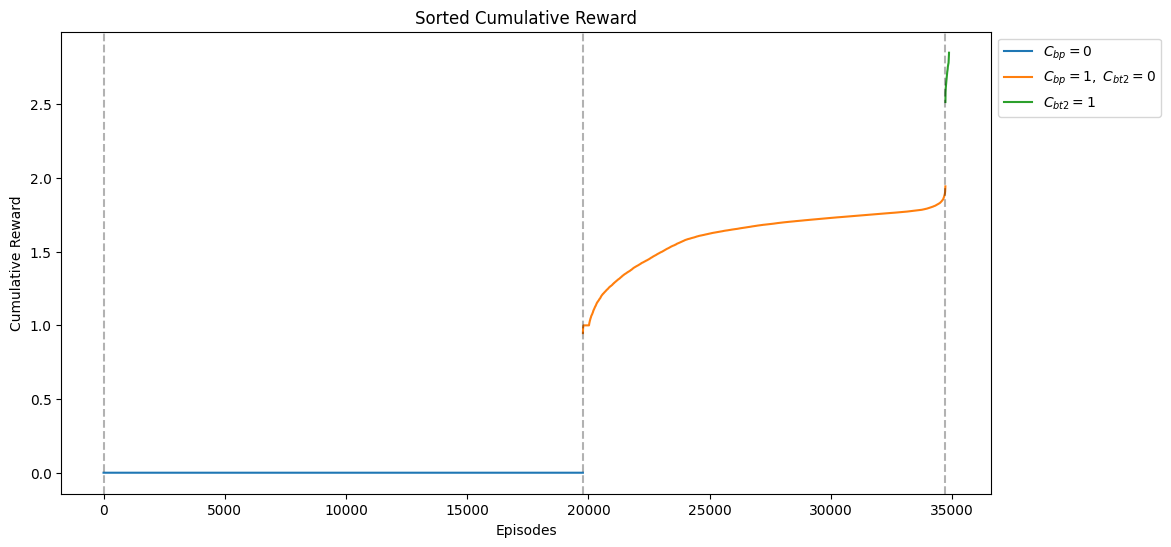

In [17]:
plot_sorted_cumulative_reward(df)

In [18]:
compare_df = pd.read_csv("../Log/2025_09_10_09_36/2025_09_10_09_36.csv")
compare_df = pd.concat([compare_df, pd.read_csv("../Log/2025_09_11_10_06/2025_09_11_10_06.csv")])
compare_df = pd.concat([compare_df, pd.read_csv("../Log/2025_09_12_07_16/2025_09_12_07_16.csv")])
compare_df = compare_df.query('cbt1==1').reset_index(drop=True)

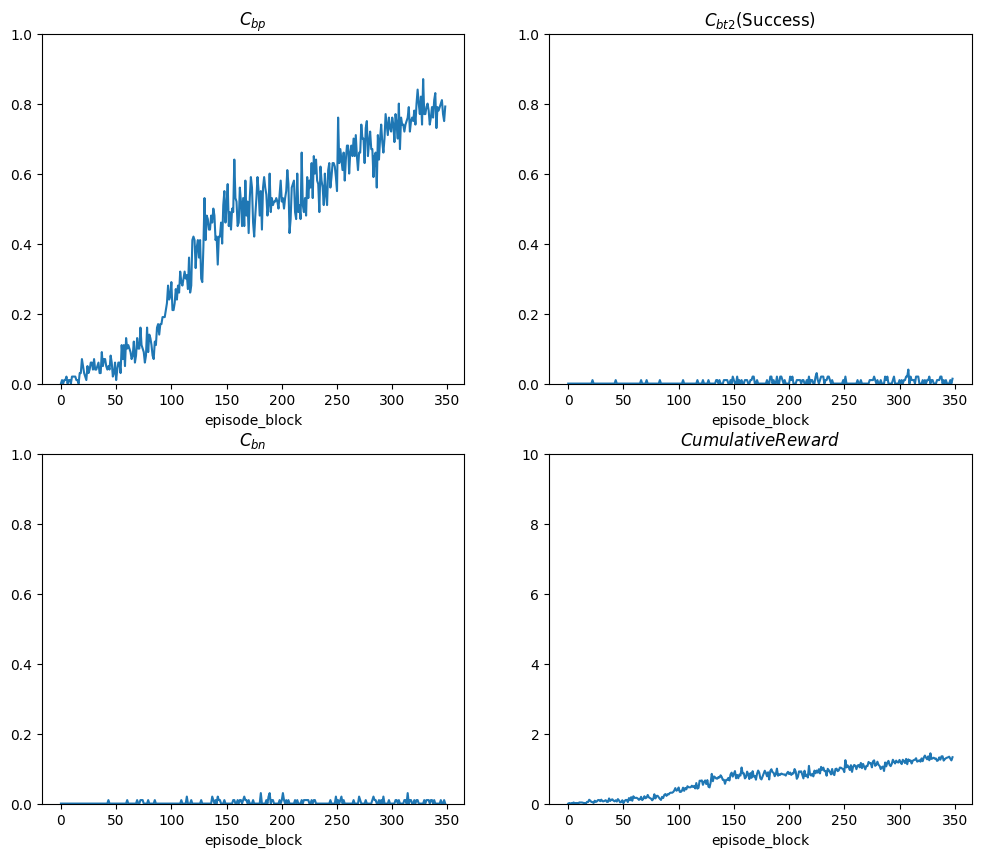

In [19]:
plot_metrics(df)

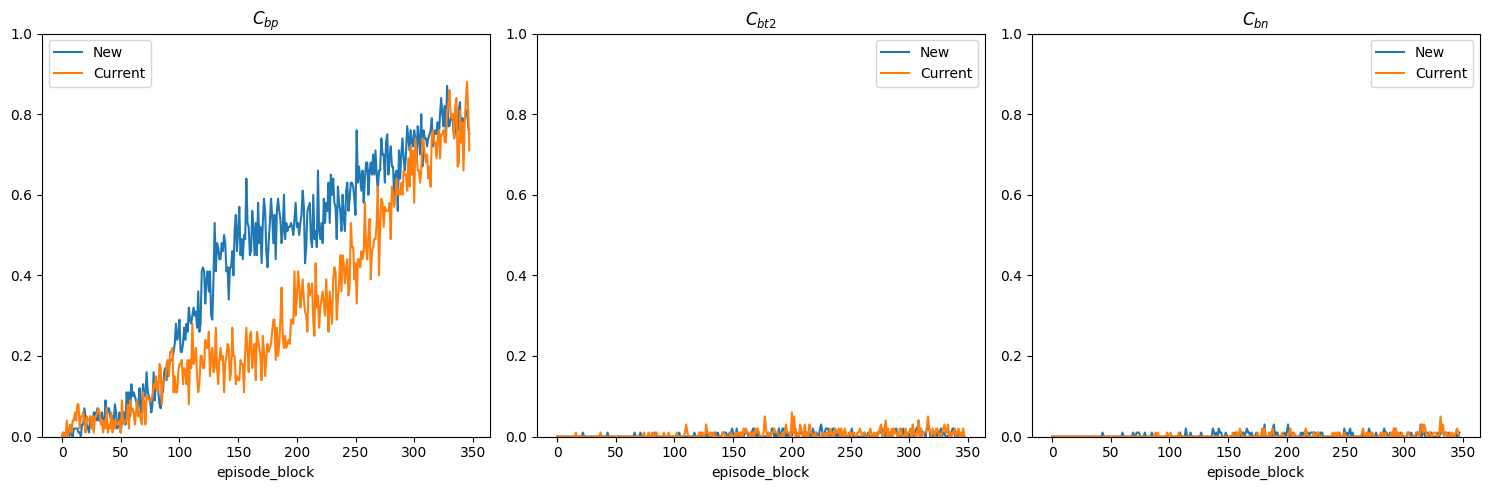

In [20]:
compare_metrics(df, compare_df, "New", "Current")

         ball_x    ball_y    ball_z  cbt1  cbp  cbt2  cbn       rtn  steps  \
2247   2.024135  0.020000  0.429633   1.0  1.0   1.0  0.0  2.690423   83.0   
4304   2.129064  0.020000 -0.130561   1.0  1.0   1.0  0.0  2.841611   52.0   
6644   3.117724 -0.073382 -0.826882   1.0  1.0   1.0  0.0  2.671328   87.0   
7170   2.024927  0.072920 -0.679803   1.0  1.0   1.0  0.0  2.770958   57.0   
8357   2.033641  0.020000 -0.010970   1.0  1.0   1.0  0.0  2.767640   60.0   
...         ...       ...       ...   ...  ...   ...  ...       ...    ...   
33817  2.792724  0.020000  0.478969   1.0  1.0   1.0  0.0  2.803919   57.0   
34095  1.923852  0.083986  0.385721   1.0  1.0   1.0  0.0  2.689227   65.0   
34250  2.598709  0.020000 -0.331232   1.0  1.0   1.0  0.0  2.768576   56.0   
34630  3.058744  0.019647  0.430239   1.0  1.0   1.0  0.0  2.658086   68.0   
34858  1.791410  0.020000  0.020768   1.0  1.0   1.0  0.0  2.651811   73.0   

       episode_block  
2247              22  
4304             

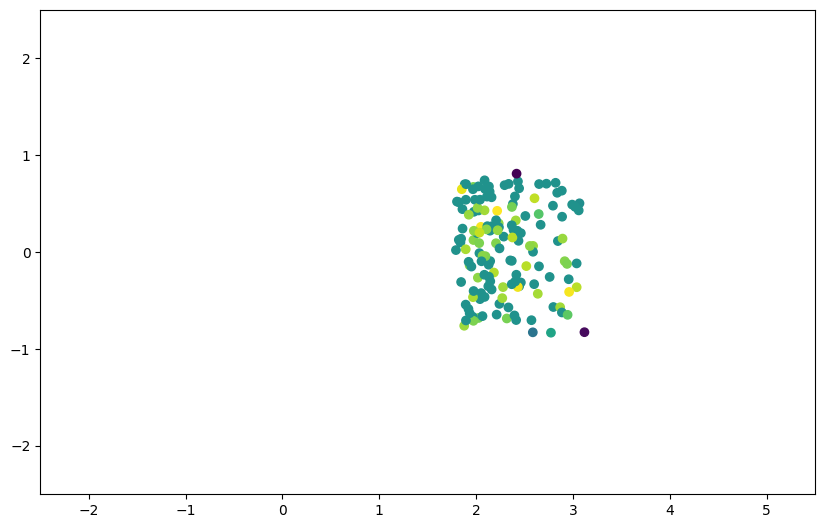

In [21]:
df_plot = df.query('cbt2==1')
print(df_plot)
colors = plt.cm.tab10.colors
print(df_plot.count())
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(df_plot['ball_x'], df_plot['ball_z'], cmap='viridis', c=df_plot['ball_y'])
ax.set_xlim(-2.5, 5.5)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect('equal')

Text(0.5, 0, 'ball X')

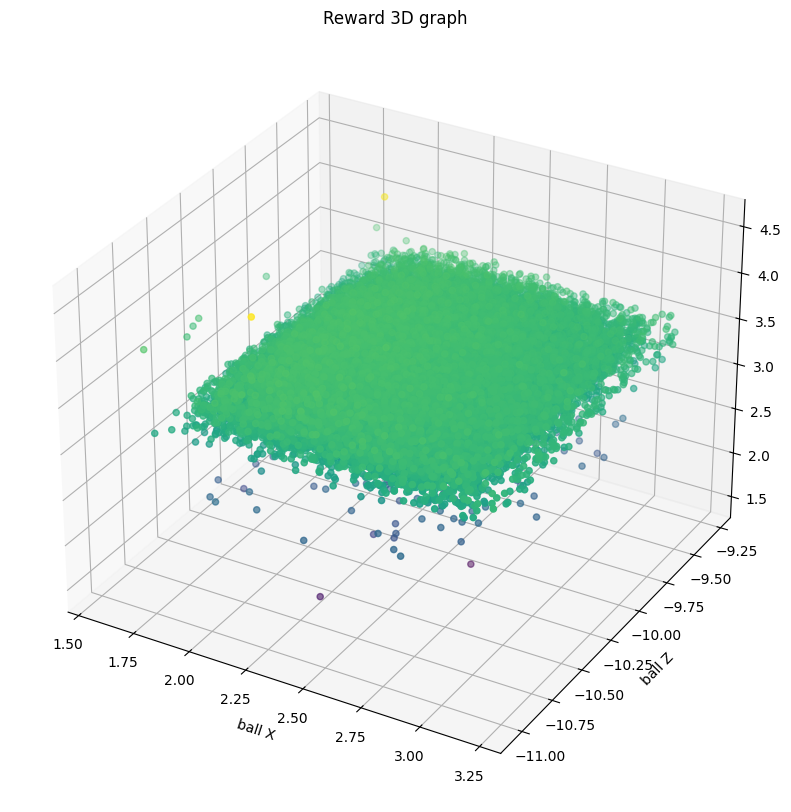

In [24]:
df_plot = df.query('cbt2==1')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_plot['ball_x'], df_plot['ball_z'], df_plot['return'], c=df_plot['return'])
ax.set_title("Reward 3D graph")
#ax.set_zlim(0, 3)
ax.set_ylabel("ball Z")
ax.set_xlabel("ball X")
#ax.set_box_aspect([1, 1, 1])

Text(0.5, 0, 'ball X')

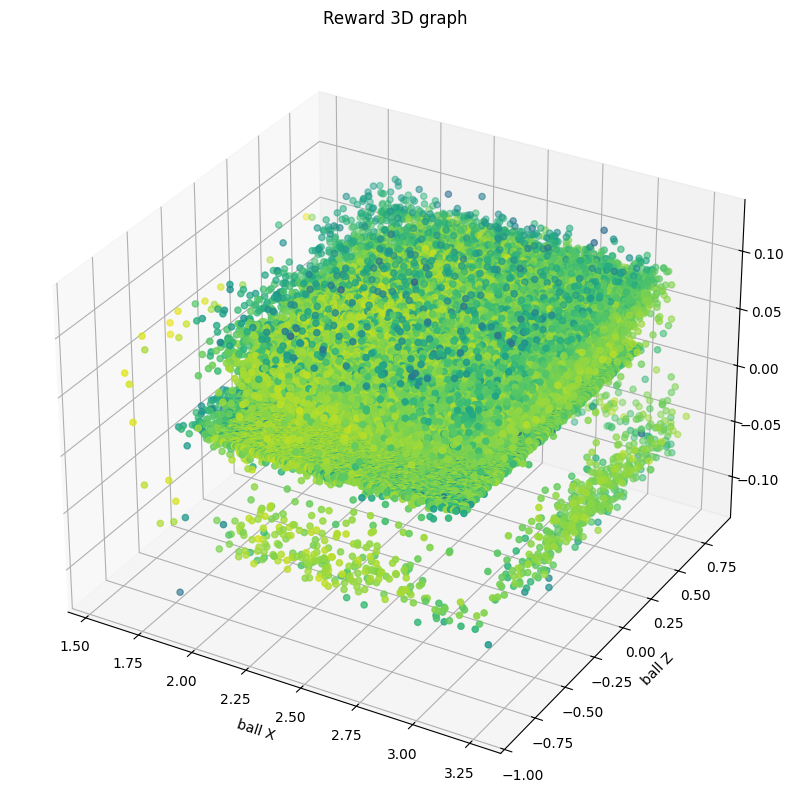

In [16]:
df_plot = df.query('cbt2==1')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_plot['ball_x'], df_plot['ball_z'], df_plot['ball_y'], c=df_plot['return'])
ax.set_title("Reward 3D graph")
#ax.set_zlim(0, 3)
ax.set_ylabel("ball Z")
ax.set_xlabel("ball X")
#ax.set_box_aspect([1, 1, 1])

In [9]:
desc = pd.read_csv("../Log/2025_08_14_12_11/Description.csv")
desc

,TargetAreaCenterX,TargetAreaCenterY,TargetAreaCenterZ,TargetAreaExtentsX,TargetAreaExtentsY,TargetAreaExtentsZ,NetCenterX,NetCenterY,NetCenterZ,NetExtentsX,NetExtentsY,NetExtentsZ
0,2.37,0.781,0,0.685,0.02,0.7625,1.685,0.83625,0,0.0075,0.07625,0.85


In [8]:
center_x

0    2.37
Name: TargetAreaCenterX, dtype: float64

0.09814414921227874
0.07920744205945655


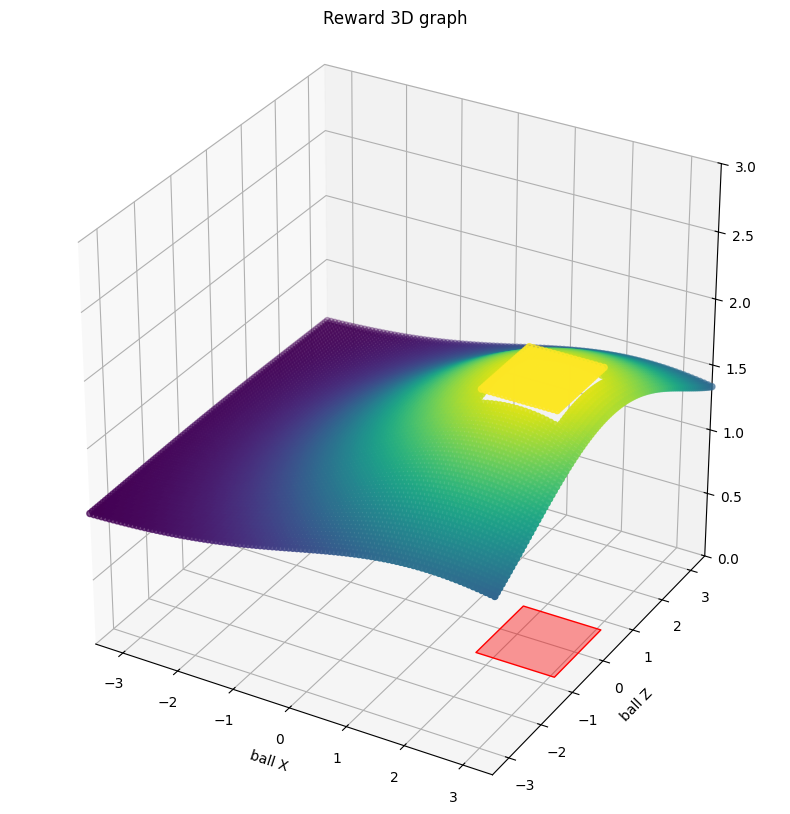

In [38]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

X = np.linspace(-3.5, 3.5, 100)
Y = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(X, Y)
center_x = desc['TargetAreaCenterX'][0]
center_y = desc['TargetAreaCenterZ'][0]
extents_x = desc['TargetAreaExtentsX'][0]
extents_y = desc['TargetAreaExtentsZ'][0]
x_min, x_max = center_x - extents_x, center_x + extents_x  # 탁구대 가로 (2.74m)
y_min, y_max = center_y - extents_y, center_y + extents_y     # 탁구대 세로 (1.525m)
z_base = 0 # z축이 위쪽이면 y_base가 0으로 간주됨 (z=0은 y=0)

def get_reward(X, Y, center_x, center_y, extents_x, extents_y):
    in_x = np.abs(X - center_x) <= extents_x
    in_y = np.abs(Y - center_y) <= extents_y
    sqr_dist_x = (X - center_x) ** 2
    sqr_dist_y = (Y - center_y) ** 2
    eps = 0.01
    d_x = 10.0 * extents_x
    d_y = 10.0 * extents_y
    a_x = -np.log(eps) / (d_x ** 2)
    a_y = -np.log(eps) / (d_y ** 2)
    print(a_x)
    print(a_y)
    
    reward = 1.0 + np.exp(-a_x * sqr_dist_x -a_y * sqr_dist_y) * ~(in_x & in_y)
    reward += (in_x & in_y) 
    return reward

Z = get_reward(X, Y, center_x, center_y, extents_x, extents_y)

    
    
ax.scatter(X, Y, Z, c=Z)
# 사각형 꼭짓점 정의 (x, y, z)
table_verts = [[
    (x_min, y_max, z_base),
    (x_min, y_min, z_base),
    (x_max, y_min, z_base),
    (x_max, y_max, z_base)
]]

# 사각형 추가
table = Poly3DCollection(table_verts, color='red', alpha=0.4)
ax.set_title("Reward 3D graph")
ax.add_collection3d(table)
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_zlim(0, 3)
ax.set_ylabel("ball Z")
ax.set_xlabel("ball X")
ax.set_box_aspect([1, 1, 1])

In [70]:
df_plot['ball_x'].max()

np.float64(5.48)

In [27]:
df_plot = df.query('cbt1==1')

Text(0.5, 0, 'ball X')

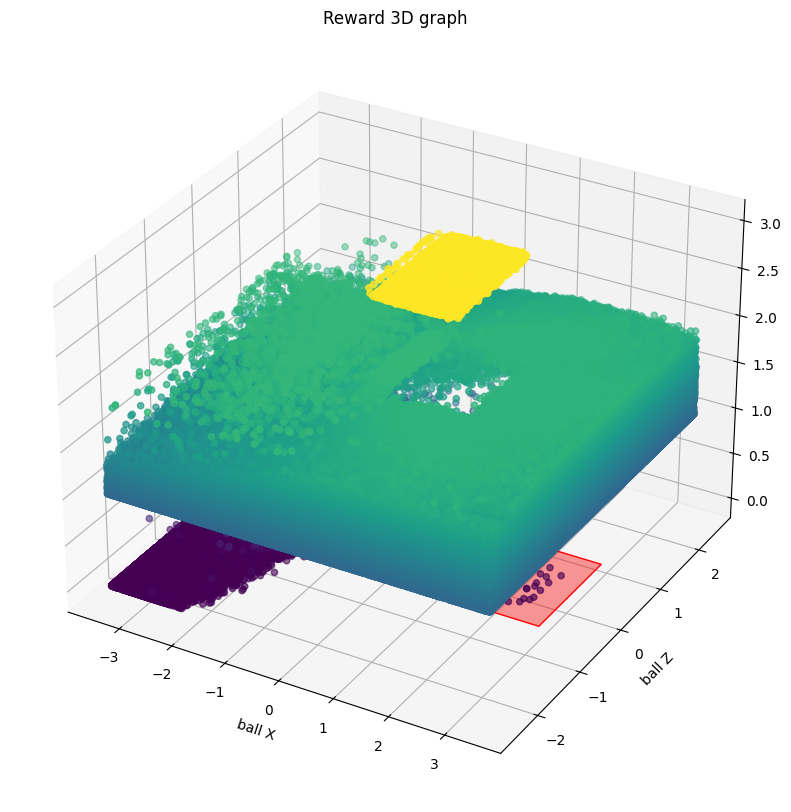

In [28]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

center_x = desc['TargetAreaCenterX'][0]
center_y = desc['TargetAreaCenterZ'][0]
extents_x = desc['TargetAreaExtentsX'][0]
extents_y = desc['TargetAreaExtentsZ'][0]
x_min, x_max = center_x - extents_x, center_x + extents_x  # 탁구대 가로 (2.74m)
y_min, y_max = center_y - extents_y, center_y + extents_y     # 탁구대 세로 (1.525m)
z_base = 0 # z축이 위쪽이면 y_base가 0으로 간주됨 (z=0은 y=0)


    
ax.scatter(df_plot['ball_x'], df_plot['ball_z'], df_plot['return'], c=df_plot['return'])
# 사각형 꼭짓점 정의 (x, y, z)
table_verts = [[
    (x_min, y_max, z_base),
    (x_min, y_min, z_base),
    (x_max, y_min, z_base),
    (x_max, y_max, z_base)
]]

# 사각형 추가
table = Poly3DCollection(table_verts, color='red', alpha=0.4)
ax.set_title("Reward 3D graph")
ax.add_collection3d(table)
#ax.set_zlim(0, 3)
ax.set_ylabel("ball Z")
ax.set_xlabel("ball X")
#ax.set_box_aspect([1, 1, 1])

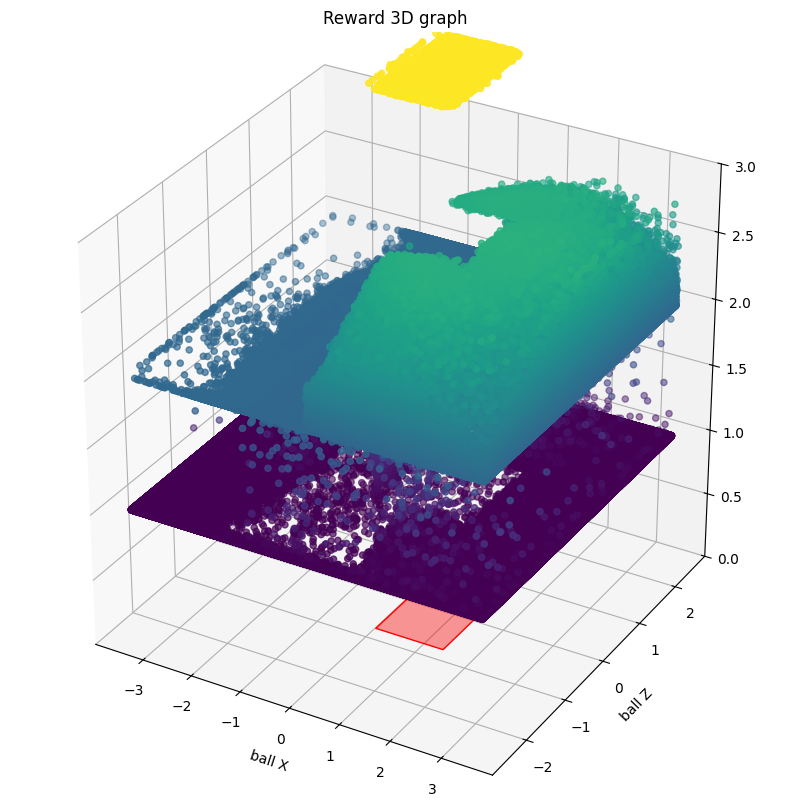

In [46]:




from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

X = np.linspace(-3.5, 3.5, 100)
Y = np.linspace(-3.5, 3.5, 100)
X, Y = np.meshgrid(X, Y)
center_x = desc['TargetAreaCenterX'][0]
center_y = desc['TargetAreaCenterZ'][0]
extents_x = desc['TargetAreaExtentsX'][0]
extents_y = desc['TargetAreaExtentsZ'][0]
x_min, x_max = center_x - extents_x, center_x + extents_x  # 탁구대 가로 (2.74m)
y_min, y_max = center_y - extents_y, center_y + extents_y     # 탁구대 세로 (1.525m)
z_base = 0 # z축이 위쪽이면 y_base가 0으로 간주됨 (z=0은 y=0)


    
ax.scatter(df_plot['ball_x'], df_plot['ball_z'], df_plot['return'], c=df_plot['return'])
# 사각형 꼭짓점 정의 (x, y, z)
table_verts = [[
    (x_min, y_max, z_base),
    (x_min, y_min, z_base),
    (x_max, y_min, z_base),
    (x_max, y_max, z_base)
]]

# 사각형 추가
table = Poly3DCollection(table_verts, color='red', alpha=0.4)
ax.set_title("Reward 3D graph")
ax.add_collection3d(table)
ax.set_zlim(0, 3)
ax.set_ylabel("ball Z")
ax.set_xlabel("ball X")
ax.set_box_aspect([1, 1, 1])

In [ ]:
!tensorboard --logdir="C:/Users/USER/Desktop/MLAgent/Results/Research0906/TableTennis"

In [4]:
df = pd.read_csv("../Log/2025_09_10_09_36/2025_09_10_09_36.csv")
df = pd.concat([df, pd.read_csv("../Log/2025_09_11_10_06/2025_09_11_10_06.csv")])
df = pd.concat([df, pd.read_csv("../Log/2025_09_12_07_16/2025_09_12_07_16.csv")])
df = df.query('cbt1==1').reset_index(drop=True)
df.describe()

,ball_x,ball_y,ball_z,pred_x,pred_y,pred_z,cbt1,cbp,cbt2,cbn,return,steps
count,708871.000000,708871.000000,708871.000000,708871.000000,708871.0,708871.000000,708871.0,708871.000000,708871.000000,708871.000000,708870.000000,708870.000000
mean,2.030074,-0.038813,-0.030245,2.192964,0.0,-0.016778,1.0,0.943544,0.718734,0.050122,2.343869,66.234504
std,1.224926,0.278883,0.574523,0.971518,0.0,0.582696,0.0,0.230800,0.449617,0.218197,0.766617,11.690905
min,-2.480000,-0.765924,-2.480000,-9.806648,0.0,-7.337716,1.0,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.031448,0.020000,-0.280474,2.187785,0.0,-0.282151,1.0,1.000000,0.000000,0.000000,1.798106,59.000000
50%,2.403116,0.020000,-0.026598,2.447112,0.0,-0.018923,1.0,1.000000,1.000000,0.000000,2.754566,66.000000
75%,2.620896,0.074948,0.234236,2.655449,0.0,0.254156,1.0,1.000000,1.000000,0.000000,2.797375,74.000000
max,5.480000,3.980000,2.480000,10.184710,0.0,6.241579,1.0,1.000000,1.000000,1.000000,2.934854,138.000000


In [16]:
df_fail = df[:-1000].query('cbp==0')